In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from matplotlib.patches import Rectangle
import cv2
import sys
import ipywidgets as widgets
import math

In [2]:
# cap = cv2.VideoCapture("./TRIM_Archana_ELAV_01_Feb-20_12-17.avi")
# number = 302

# cap = cv2.VideoCapture("./60fps/TRIM_3_jag_Set2_Apr-04_13-13.avi")
# number = 861

# cap = cv2.VideoCapture("./60fps/TRIM_4_jag_Set1_Apr-05_09-38.avi") # Try using mp4 video directly, may have to change codec
# number = 816

#Cut
# cap = cv2.VideoCapture("./60fps/Cut_Set1_July_10_2024/TRIM_1_Cut_Set1_July_10_2024.mp4")
# number = 871

# cap = cv2.VideoCapture("./60fps/Cut_Set1_July_10_2024/TRIM_2_Cut_Set1_July_10_2024.mp4")
# cap = cv2.VideoCapture("./60fps/Cut_Set3_July_16_2024/TRIM_1_Cut_Set3_July_16_2024.mp4")

# July 19 Set 4
cap = cv2.VideoCapture("./60fps/July_19_2024_Set_4/TRIM_1_Cut_Set4_July_19_2024.mp4")

frames = []
raw = []

while True:
    
    ret, frame = cap.read()
    raw.append(frame)
    
    if ret is False:
        break
    else:
        frame = frame.mean(axis=2)
        frame = (frame*128) / frame.mean()
        frames.append(frame);
    
print(len(frames))
print(len(raw))

number = len(frames)
print(number)

frames = np.array(frames[:number])
raw = np.array(raw[:number])

print(len(frames))
print(len(raw))

871
872
871
871
871


In [3]:
bg = np.max(frames, axis = 0)
fg = []

for i in tqdm(range(number)):
    fg.append(frames[i]-bg)
    fg[i] = (fg[i]-fg[i].min()) / (fg[i].max() - fg[i].min()) * 255;

100%|██████████| 871/871 [02:35<00:00,  5.62it/s]


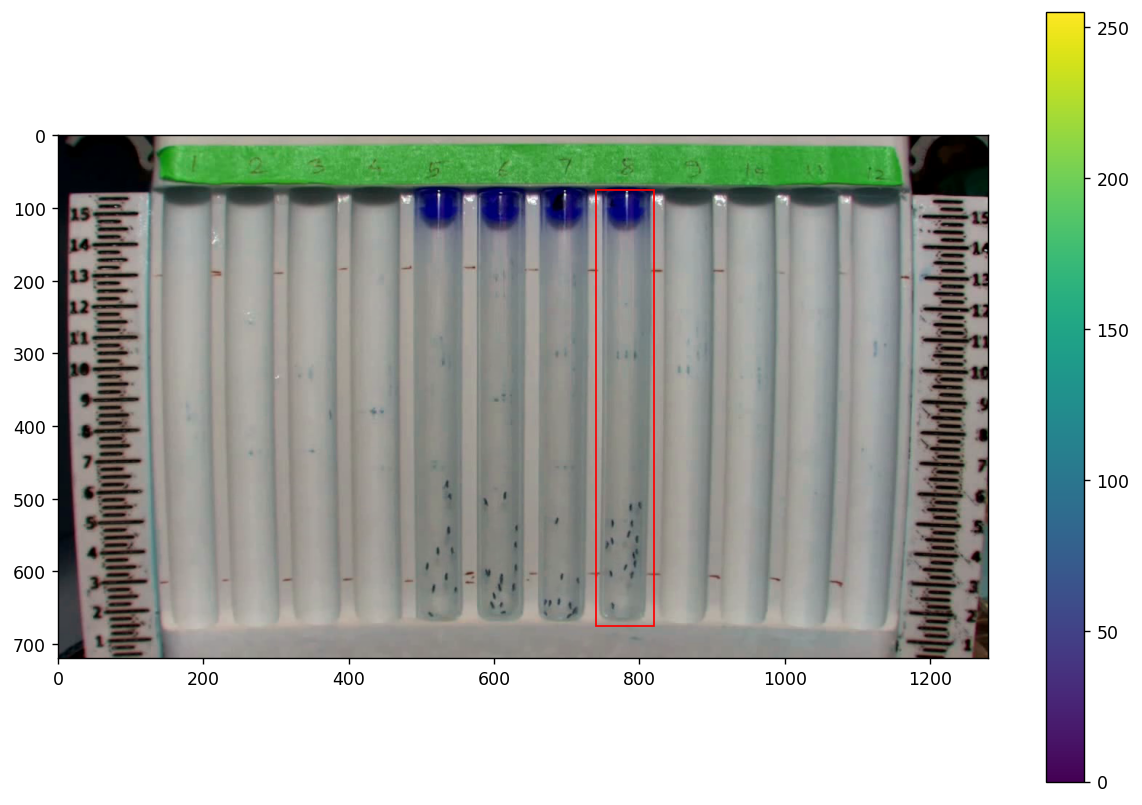

In [220]:
# Archana
# x1=120
# y1=75
# x2=205
# y2=680
# n = 6

# Trim 3
# x1 = 530
# y1 = 90
# x2 = 610
# y2 = 680
# n = 6

# Trim 4
# x1 = 545
# y1 = 90
# x2 = 625
# y2 = 680
# n = 11

# Cut Set 1
# Vial 2
# x1 = 552
# y1 = 72
# x2 = 635
# y2 = 675
# n = 10
# Vial 3
# x1 = 637
# y1 = 80
# x2 = 724
# y2 = 675
# n=10

# Cut Set 3 July 16 Trim 1
# Vial 3
# x1 = 650
# y1 = 75
# x2 = 726
# y2 = 675
# n=10
# Vial 4
# x1 = 735
# y1 = 75
# x2 = 815
# y2 = 675
# n=10

# Cut Set 4 July 19 (New lighting)
boundary=False
# Vial 3
# x1 = 655
# y1 = 75
# x2 = 731
# y2 = 675
# n=11
# Vial 4
hiding = False
x1 = 740
x2 = 820
if (boundary):
    y1 = 188
    y2 = 600
else:
    y1 = 75
    y2 = 675
n=15
plt.figure(figsize=(12,8), dpi = 125)
if (hiding):
    hide_bottom = y2-30
    hide_rect = Rectangle((x1, hide_bottom), x2-x1, y2-hide_bottom, linewidth=1, edgecolor='b', facecolor = 'none')
    plt.gca().add_patch(hide_rect)
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.imshow(raw[102])
plt.colorbar()
plt.show()



100%|██████████| 871/871 [00:00<00:00, 599875.01it/s]


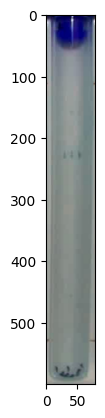

In [221]:
fr = []
for i in tqdm(range(number)):
    fr.append(raw[i][y1:y2,x1:x2])

plt.imshow(fr[0])

100%|██████████| 871/871 [02:20<00:00,  6.19it/s]


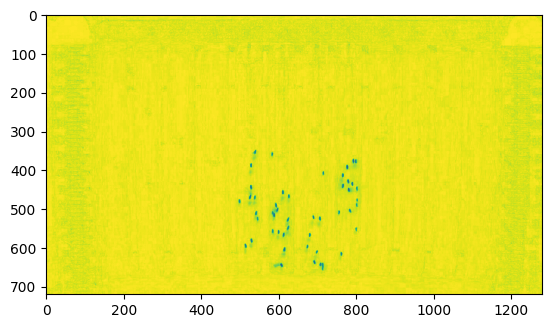

In [191]:
retry = []
for i in tqdm(range(len(fr))):
    retry.append(fg[i] < (0.6*255))

fg_bin = []
for i in tqdm(range(len(fg))):
    fg_bin.append(fg[i] < (0.6*255))
fg_bin = np.array(fg_bin)

plt.imshow(fg[200])

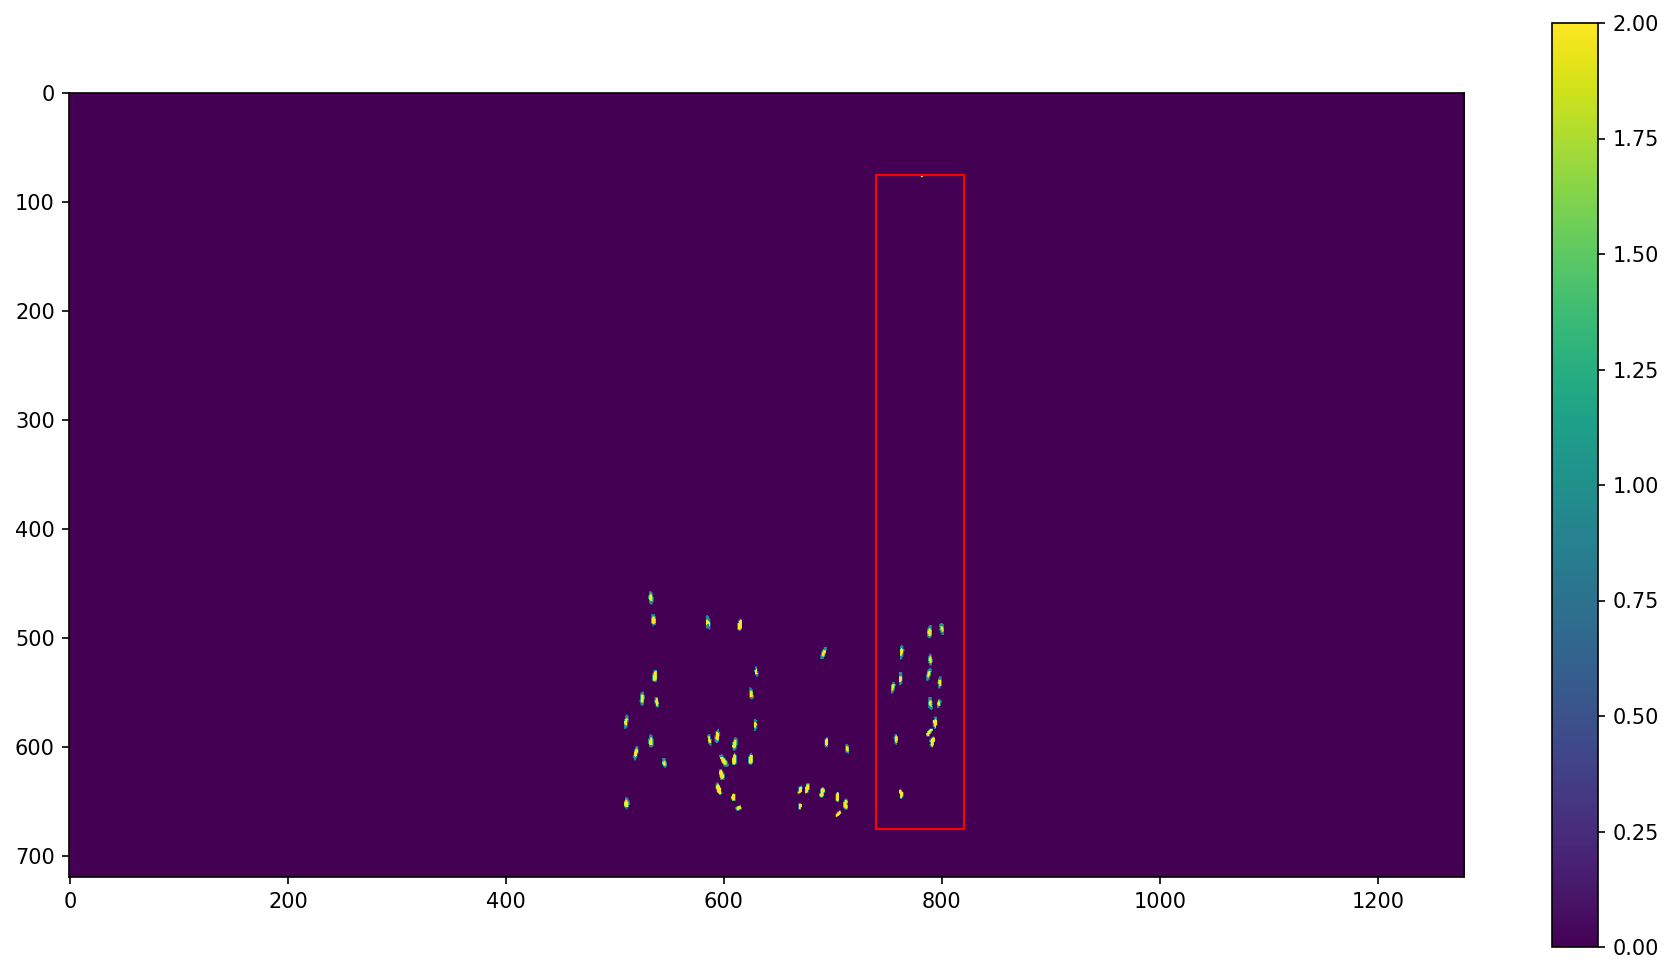

In [192]:
plt.figure(figsize=(15,8), dpi = 150)

def get_sum(a, b):
    sum = []
    onlytwo = []
    for row in range(len(a)):
        sum.append([])
        onlytwo.append([])
        for col in range(len(a[0])):
            if (a[row][col] and b[row][col]):
                sum[row].append(2)
                onlytwo[row].append(1);
            elif (a[row][col] or b[row][col]):
                sum[row].append(1)
                onlytwo[row].append(0);
            else:
                sum[row].append(0)
                onlytwo[row].append(0);
    return [sum, onlytwo]

rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')

plt.gca().add_patch(rect)
plt.imshow(get_sum(fg_bin[115],fg_bin[116])[0]) # Why is this cut off
plt.colorbar()
plt.show()

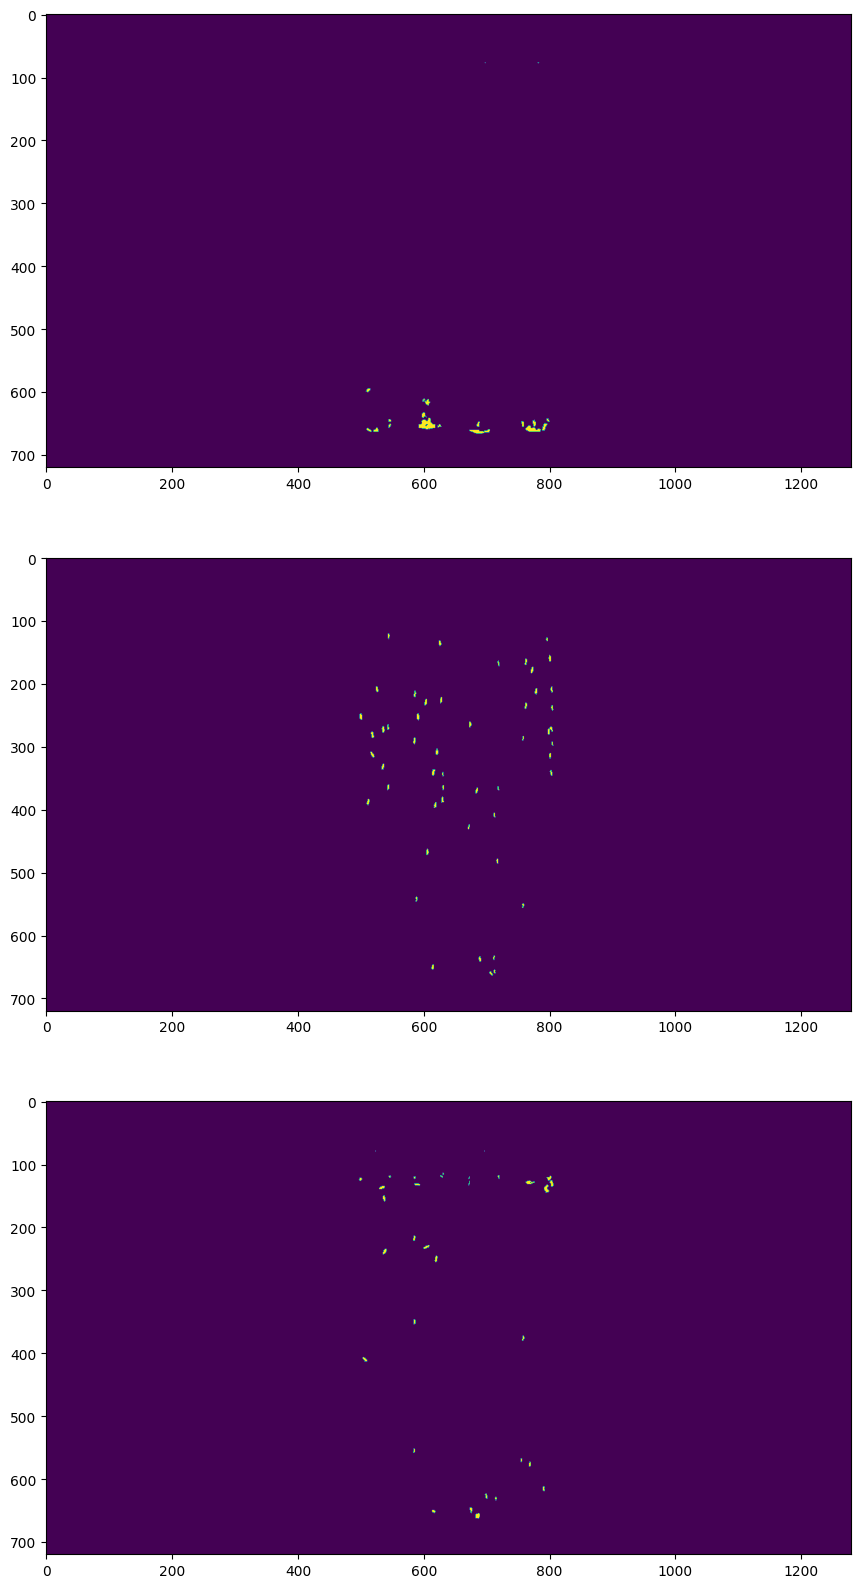

In [169]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(25, 20))
ax1.imshow(fg_bin[0])
ax2.imshow(fg_bin[400])
ax3.imshow(fg_bin[800])

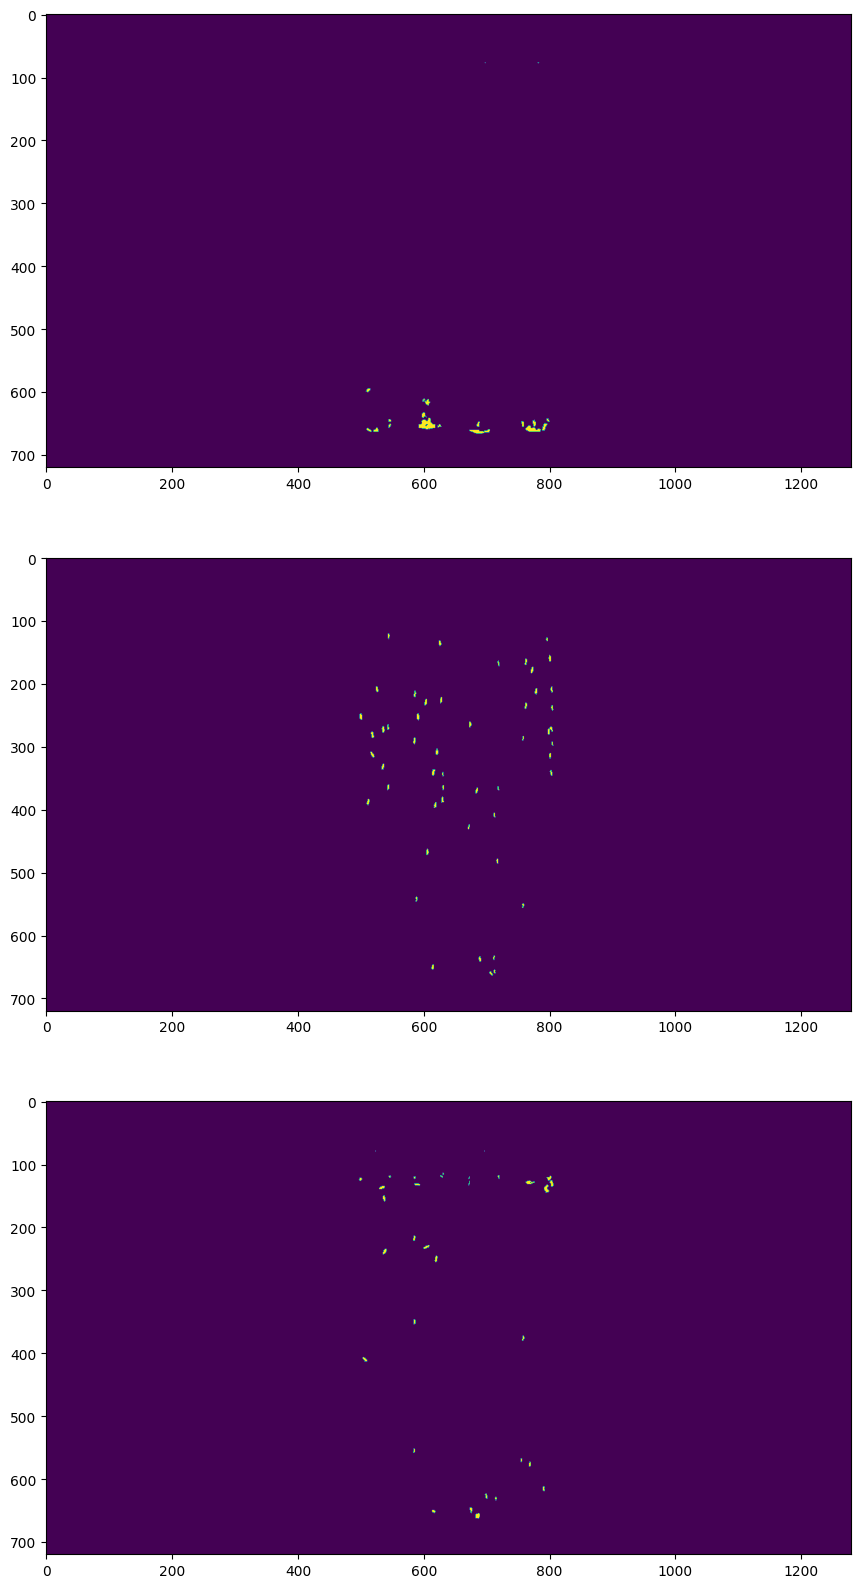

In [170]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(25, 20))
ax1.imshow(retry[0])
ax2.imshow(retry[400])
ax3.imshow(retry[800])

In [171]:
"""

Steps:

1. Find components (flies) in two adjacent frames
* Done through background subtraction, finished

2. Add adjacent frames, find region of overlap (where frames sum to 2)
* Region of overlap is found by get_sum method, finished

3. Link overlapping components from adjacent frames
* Not implemented yet. If no overlap found for some components, skip it 
* If only one component is not linked between two frames, you can infer that they are linked

4. Add to a list of the path of individual flies
* Easy to do one components are linked

# Save images from plot into folders, can use cv2 to stitch together into video
"""

'\n\nSteps:\n\n1. Find components (flies) in two adjacent frames\n* Done through background subtraction, finished\n\n2. Add adjacent frames, find region of overlap (where frames sum to 2)\n* Region of overlap is found by get_sum method, finished\n\n3. Link overlapping components from adjacent frames\n* Not implemented yet. If no overlap found for some components, skip it \n* If only one component is not linked between two frames, you can infer that they are linked\n\n4. Add to a list of the path of individual flies\n* Easy to do one components are linked\n\n# Save images from plot into folders, can use cv2 to stitch together into video\n'

In [222]:
def get_distance(p1, p2):
    return ((((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))**(0.5));

def analyze(frame, x1, x2, y1, y2, thresh): # Makes the groups of pixels that represent each fly
    # All corners are inclusive
    checked = np.zeros((y2-y1+1, x2-x1+1))
    components = np.zeros((y2-y1+1, x2-x1+1))
    locations = []
    locations.append([])
    cur = 0

    def floodfill(r, c):
        if (checked[r-y1][c-x1]==1):
            return;
        elif (fg_bin[frame][r][c]==0):
            components[r-y1][c-x1]=0;

        else:
            checked[r-y1][c-x1]=1;
            locations[cur].append([r, c])
            components[r-y1][c-x1]=cur+1;
            if not (c-1<x1): floodfill(r, c-1)
            if not (c+1>x2): floodfill(r, c+1)
            if not (r+1>y2): floodfill(r+1, c)
            if not (r-1<y1): floodfill(r-1, c);

    for row in range(y1, y2+1):
        for col in range(x1, x2+1):
            pixel = fg_bin[frame][row][col]
            floodfill(row, col) # Think about ways to do it in one floodfill
            if (pixel is True):
                continue;
            
            if (locations[cur]==[]): 
                continue;
            elif (len(locations[cur])<thresh):
                for r, c in locations[cur]:
                        components[r-y1][c-x1] = 0;
                del locations[cur]
                locations.append([])
                continue
            else:
                locations.append([])
                cur+=1;

    del locations[-1] # delete extraneous group made in the for loop

    for i in range(len(locations)):
          if (len(locations[i])<thresh):
            del locations[i]
            i-=1;


    if len(locations)>n:
        largest = [] # Size, group
        for i in range(len(locations)):
            largest.append([len(locations[i]), i])
        largest = sorted(largest)[::-1]
        locations = [locations[j] for j in [k[1] for k in largest[0:n]]]

            
            
    return [locations,components]

y = analyze(2, x1, x2, y1, y2, 7)

In [223]:
# Change analyze threshold system so it just finds 6 biggest instead above a threshold
# Check if this fixes analyzing, and groups getting linked to same group

In [224]:
analyzed = []
for i in tqdm(range(number)):
    res = analyze(i, x1, x2, y1, y2, 4)
    analyzed.append([res[0], res[1]])

100%|██████████| 871/871 [04:09<00:00,  3.49it/s]


Frame 70 
 13 Components: 
Group 0 is 17 pixels, around ( 479 , 59 )
Group 1 is 29 pixels, around ( 480 , 35 )
Group 2 is 25 pixels, around ( 492 , 44 )
Group 3 is 28 pixels, around ( 500 , 31 )
Group 4 is 28 pixels, around ( 509 , 33 )
Group 5 is 23 pixels, around ( 509 , 54 )
Group 6 is 26 pixels, around ( 523 , 30 )
Group 7 is 12 pixels, around ( 528 , 54 )
Group 8 is 27 pixels, around ( 531 , 16 )
Group 9 is 50 pixels, around ( 540 , 51 )
Group 10 is 36 pixels, around ( 554 , 30 )
Group 11 is 30 pixels, around ( 554 , 39 )
Group 12 is 11 pixels, around ( 584 , 24 )


[]

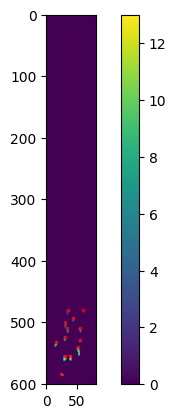

In [225]:
# Testing
f = 70

results = analyzed[f]
plt.imshow(results[1])
plt.colorbar()
print("Frame", f, "\n", len(results[0]), "Components: ")
dotx = []
doty = []
for i in range(len(results[0])):
    print("Group", i, "is", len(results[0][i]), "pixels, around (", results[0][i][0][0]-y1, ",", results[0][i][0][1]-x1, ")")
    doty.append(results[0][i][0][0]-y1)
    dotx.append(results[0][i][0][1]-x1);
plt.scatter(dotx, doty, marker = "x", c="r", s=3, alpha=0.8)
plt.plot()

100%|██████████| 871/871 [00:00<00:00, 15352.65it/s]


[]

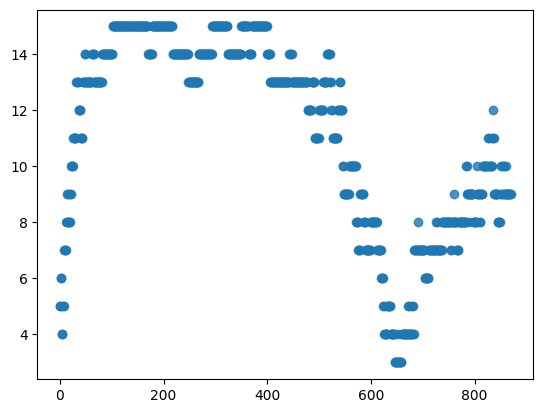

In [226]:
n_groups = []
group_size = []
for frame in tqdm(range(number)):
    n_groups.append(len(analyzed[frame][0]))
    g = []
    for group in analyzed[frame][0]:
        g.append(len(group))
    group_size.append(g)

plt.scatter([i for i in range(len(n_groups))], n_groups, alpha=0.8)
plt.plot()

[]

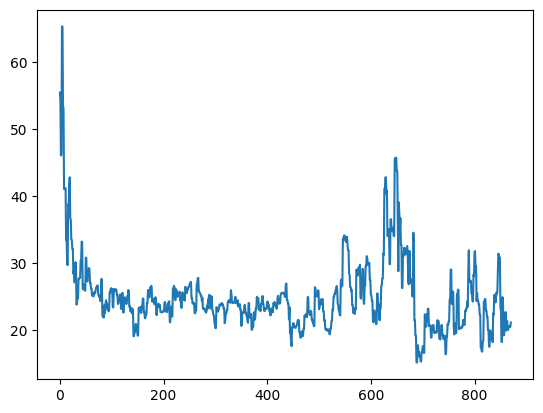

In [227]:
x = []
y = []
e = []

for r in range(len(group_size)):
    x.append(r)
    y.append(np.mean(group_size[r]))
    e.append(np.std(group_size[r]))
plt.plot(x, y)
#plt.errorbar(x, y, e)
plt.plot()

## Forcing Groups

In [11]:
lc = [] # Locations
for f in tqdm(range(len(analyzed))): # Make points for each of the 6 groups for each frame (largest are duplicated if not groups)
    lc.append([])
    z = analyzed[f][0] # List of pixels in each group
    px = dict()
    for g in range(len(z)):
        px[len(z[g])] = g
    spx = sorted(px.keys()) # least to greatest

    for g in range(len(z)): # Assign legit found groups into lc
        lc[-1].append(z[g][len(z[g])//2])

    for g in range(6-len(z)): # Force groups to 6
        lc[-1].append(z[px[spx[-1]]][len(z[px[spx[-1]]])//2])
        spx.remove(spx[-1]);



100%|██████████| 300/300 [00:00<00:00, 22107.48it/s]


100%|██████████| 299/299 [00:00<00:00, 25929.84it/s]


min dist 1.0
paired 0 and 0

min dist 7.0710678118654755
paired 1 and 1

min dist 0.0
paired 2 and 2

min dist 7.0710678118654755
paired 3 and 3

min dist 0.0
paired 4 and 4

min dist 100.2845950283492
paired 5 and 5

Group 0
Frame 116 --> 174.59667808981933
Frame 119 --> 159.53056133543816
Frame 120 --> 186.06719216455113
Frame 121 --> 174.0
Frame 194 --> 399.2818553353007
Frame 217 --> 187.18172987767795
Frame 282 --> 226.10838109190027
Frame 284 --> 227.03523955544875
Group 1
Group 2
Group 3
Group 4
Frame 171 --> 155.54099138169335
Group 5
Frame 6 --> 199.64217991196148
Frame 7 --> 198.8164983093707
Frame 8 --> 204.88289338058462
Frame 9 --> 202.89159667172024
Frame 106 --> 185.4427135263071
Frame 125 --> 155.9134375222354
Frame 170 --> 160.63934760823702
Count: 16


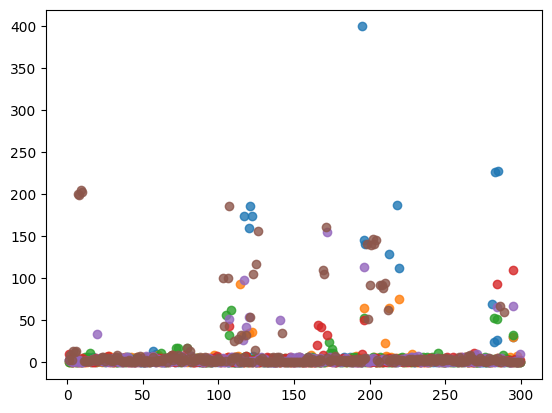

In [12]:
check = 106

points = [[],[],[],[],[],[]];
min_dists = [[],[],[],[],[],[]]
for g in range(len(lc[0])):
    points[g].append(lc[0][g]);

for i in tqdm(range(1, len(lc))): # for each frame
    last = lc[i-1]
    present = lc[i]
    need = [0, 1, 2, 3, 4, 5] # groups that haven't been matched yet

    for j in range(len(present)): # for each present group (fly)
        min_dist = 9999999
        min_group = -1
        a = present[j]

        for k in need: # match it to the closest unpaired group from the i-1 frame
            b = last[k]
            dist = math.sqrt((((b[1]-a[1])*(b[1]-a[1]))+((b[0]-a[0])*(b[0]-a[0]))));
            #if i==check: print(dist)
            if  dist < min_dist:
                min_dist = dist
                min_group = k;

        need.remove(min_group)
        if i==check:
            print("min dist", min_dist)
            print("paired", j, "and", min_group)
            print()
        points[min_group].append(present[j])
        min_dists[min_group].append(min_dist)

for i in range(6):
    plt.scatter([x for x in range(1, 300)], min_dists[i], alpha = 0.8)

thresh = 150
counter = 0
gnum = 0
for g in min_dists:
    print("Group", gnum)
    gnum+=1;
    for v in range(len(g)):
        if g[v]>thresh:
            print("Frame", v, "-->", g[v])
            counter+=1;
print("Count:", counter)


## Not Forcing Groups

[]

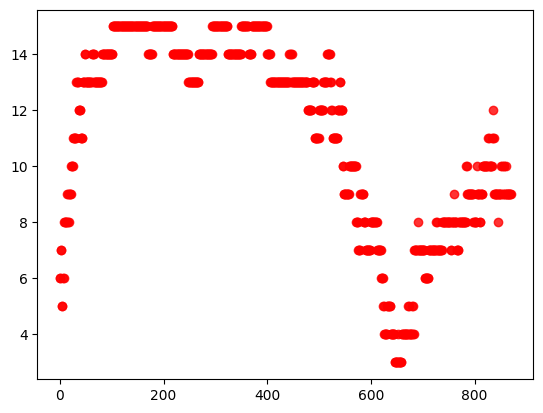

In [228]:
def get_lc(double_threshold):
    cl = []
    for f in range(len(analyzed)):
        cl.append([])
        z = analyzed[f][0][:]
            
        for g in range(len(z)):
            if (len(z[g])>double_threshold):
                cl[-1].append(z[g][len(z[g])//3])
                cl[-1].append(z[g][(len(z[g])//3)*2])
            else:        
                cl[-1].append(z[g][(len(z[g])//2)])
    return cl;
lc = get_lc(100)

def find_n_groups(cl):
    ngroups = []
    for frame in range(number):
        ngroups.append(len(cl[frame]))
    return ngroups;

n_groups = find_n_groups(lc)
plt.scatter([i for i in range(len(n_groups))], n_groups, alpha=0.8, color='r')
plt.plot()

Min Double Threshold = 36


[]

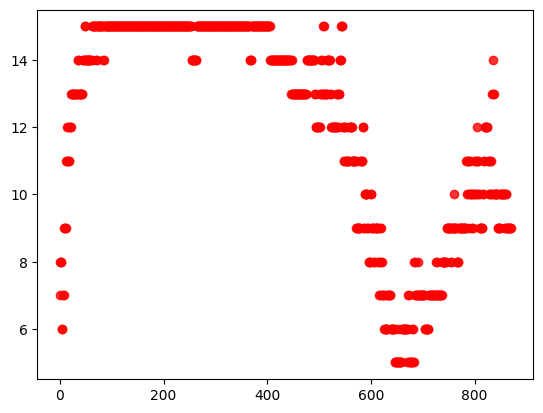

In [229]:
fine = True
max_flies_in_a_given_frame = 15
starting_double_thresh = 1000
inc = 0
while (fine):
    lc = get_lc(starting_double_thresh-inc)
    for num in find_n_groups(lc):
        if num>max_flies_in_a_given_frame:
            fine = False
            break
    inc+=1;
print("Min Double Threshold =", starting_double_thresh-inc+2)

double_threshold = starting_double_thresh-inc+2

lc = get_lc(double_threshold)
n_groups = find_n_groups(lc)

plt.scatter([i for i in range(len(n_groups))], n_groups, alpha=0.8, color='r')
plt.plot()


In [230]:
def find_mins(present, last):
    min_distance = []

    for p in range(len(present)): # First index is paired present location, second is old paired location
        min_dist = 9999
        index = -1
        if present[p] == [-1, -1]:
            continue;

        for l in range(len(last)):
            if (last[l] == [-1, -1]):
                continue;
            distance = get_distance(present[p], last[l])
            
            if distance<min_dist:
                min_dist = distance
                index = l;
        min_distance.append([min_dist, p, index]) # minimum distance, present, old
    return min_distance

"""def smallest_min(min_distance):
    min_dist = 999
    new_index = -1
    old_index = -1

    for i in range in (len(min_distance)):
        if min_distance[i][0]<min_dist:
            min_dist = min_distance[i][0]
            new_index = i
            old_index = min_distance[i][1]
            
    return (min_dist, new_index, old_index);"""



'def smallest_min(min_distance):\n    min_dist = 999\n    new_index = -1\n    old_index = -1\n\n    for i in range in (len(min_distance)):\n        if min_distance[i][0]<min_dist:\n            min_dist = min_distance[i][0]\n            new_index = i\n            old_index = min_distance[i][1]\n            \n    return (min_dist, new_index, old_index);'

In [231]:
# Pair closest
# when recalculating min dists, can rep dist in vector form so more efficient, look into using graph and nodes if needed
clc = lc[:]
repeat_counter = 0;
points = [[]];
stop=[]
new_thresh = 450

for g in range(len(clc[0])): # Put in first frame values
    points[0].append(clc[0][g]);
for r in range(n-len(clc[0])):
    points[0].append([-1, -1]) # (-1, -1) = invalid, not in frame

residuals = []

found = len(clc[0])
remember = [[-1, -1] for i in range(n)]

for frame in tqdm(range(1, len(clc))): # for each frame
    last = points[frame-1][:]
    present = clc[frame][:]

    remember_ind = [] # Adding remember into last and figuring out ind to take out
    for re in range(len(remember)):
        if remember[re] != [-1, -1]:
            remember_ind.append(re)
            # if last[re] != [-1, -1]:it's possible it's just rewriting the same remember from last frame
            last[re] = remember[re]

    positions = [[-1, -1] for i in range(n)]

    new_need = [i for i in range(len(present))] # New groups that need to be paired
    old_need = []                               # Old groups that need to be paired
    for i in range(len(last)):
        if last[i] != [-1, -1]:
            old_need.append(i)
            
    frame_residuals = []

    min_distance = sorted(find_mins(present, last)) # For each group: [min_dist, paired new index, closest old index]

    if (frame in stop):
        print("Yee")
        # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
        # ax1.imshow(fg_bin[frame-1])
        # ax2.imshow(fg_bin[frame])
        # for t in range(len(min_distance)):
        #     ax1.plot([clc[frame-1][min_distance[t][2]][1],clc[frame][min_distance[t][1]][1]],[clc[frame-1][min_distance[t][2]][0],clc[frame][min_distance[t][1]][0]], marker = "+")
        # for t in range(len(lc[frame-1])):
        #     ax1.scatter([lc[frame-1][t][1]], [lc[frame-1][t][0]], s=1)
        # for t in range(len(lc[frame])):
        #     ax2.scatter([lc[frame][t][1]], [lc[frame][t][0]], s=1)

    for o in range(len(old_need)):
        if len(new_need)>0:
            if (min_distance[o][2] not in old_need or min_distance[o][1] not in new_need):
                del min_distance[o:]
                f_present = [[-1, -1] for i in present]
                f_last = [[-1, -1] for i in last]
                for ne in new_need:
                    f_present[ne] = present[ne]
                for ol in old_need:
                    f_last[ol] = last[ol]
                for item in sorted(find_mins(f_present, f_last)):
                    min_distance.append(item)

            positions[min_distance[o][2]] = present[min_distance[o][1]]
            frame_residuals.append(round(min_distance[o][0], 2))

            if min_distance[o][2] in remember_ind:
                remember[min_distance[o][2]] = [-1, -1]
            old_need.remove(min_distance[o][2])
            new_need.remove(min_distance[o][1])
        else: # Should not get here before new, all new paired, old leftover and remember
            break;
    
    for ol in old_need:
        remember[ol] = last[ol]

    if (len(present)>found):
        old_found = found
        found = len(present)
        i = 0
        for ne in new_need:
            positions[old_found+i] = present[ne][:]
            i+=1;

    points.append(positions)
    residuals.append(frame_residuals)
print("done")


100%|██████████| 870/870 [00:00<00:00, 5400.23it/s]

done


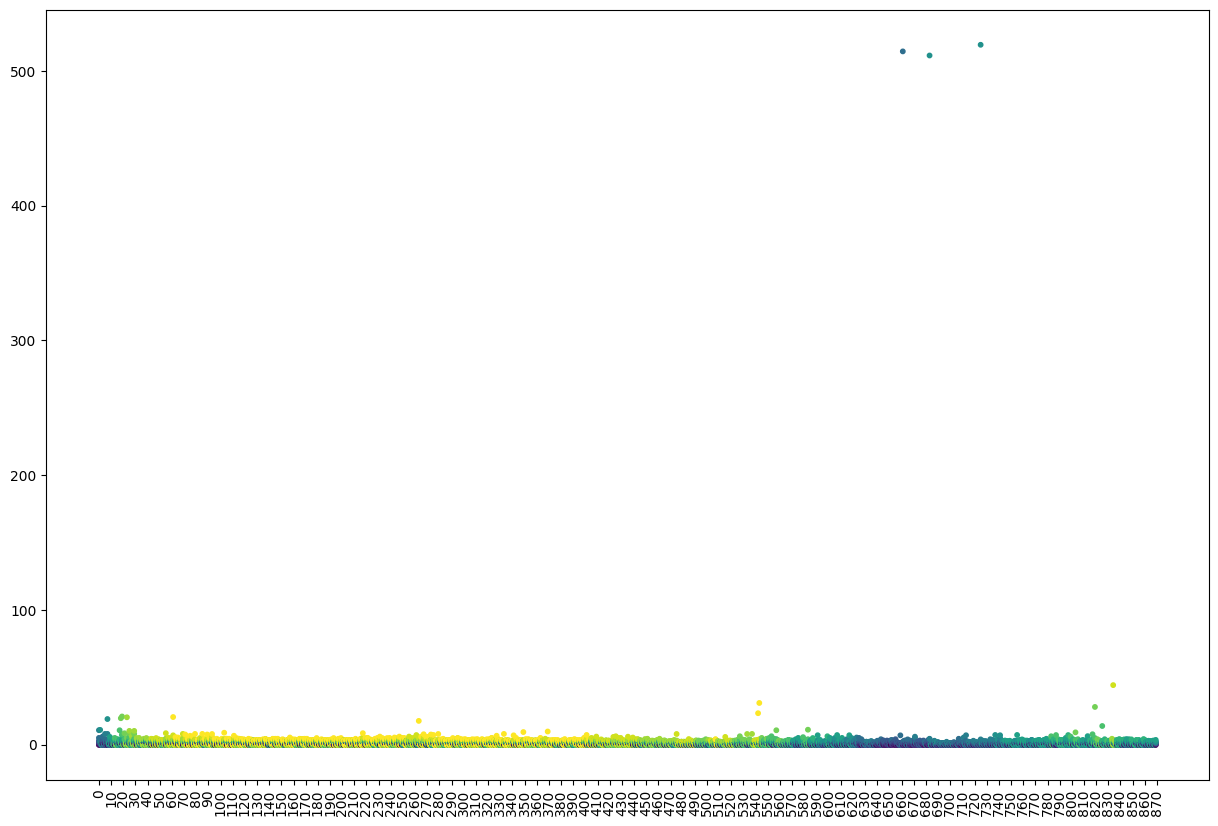

In [232]:
x = []
y = []
colors = []
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_xticks(np.arange(0, number, 10))
ax.tick_params(axis='x', labelrotation=90)

for r in range(len(residuals)):
    for c in range(len(residuals[r])):
        x.append(r)
        y.append(residuals[r][c])
        colors.append(c)
ax.scatter(x, y, c = colors, s=10)

In [233]:
"""

    [   
                                distance
            old     g1    g2    g3    g4    g5    g6           col count = len(last)
        new
        #1        [  a,    b,    c,    d,    e,    f  ]
        #2        []
        #3        []
        #4        []
        #5        []
        #6        []

row count = len(present)

    ]

"""
"""

min_distance:
    [
        #1    [shortest dist to old, closest old group #]
        #2    []
        #3    []
        #4    []
        #6    []
        #5    []
    ]

    
6 --> 5
Pair 5, remember 6th

5 --> 6 after remember
Pair 5, pair 6th with remembered

5 --> 6 w/o remember
Pair 5, start 6th

- Take out jumps in a filtered version of the pots (only want to measure speed of movement of flies)
- Make sure 10 flies analysis works, get cleaner videos from Dave
- Make sure current analysis algorithm is not the problem for the 10 flies
"""

'\n\nmin_distance:\n    [\n        #1    [shortest dist to old, closest old group #]\n        #2    []\n        #3    []\n        #4    []\n        #6    []\n        #5    []\n    ]\n\n    \n6 --> 5\nPair 5, remember 6th\n\n5 --> 6 after remember\nPair 5, pair 6th with remembered\n\n5 --> 6 w/o remember\nPair 5, start 6th\n\n- Take out jumps in a filtered version of the pots (only want to measure speed of movement of flies)\n- Make sure 10 flies analysis works, get cleaner videos from Dave\n- Make sure current analysis algorithm is not the problem for the 10 flies\n'

## Check

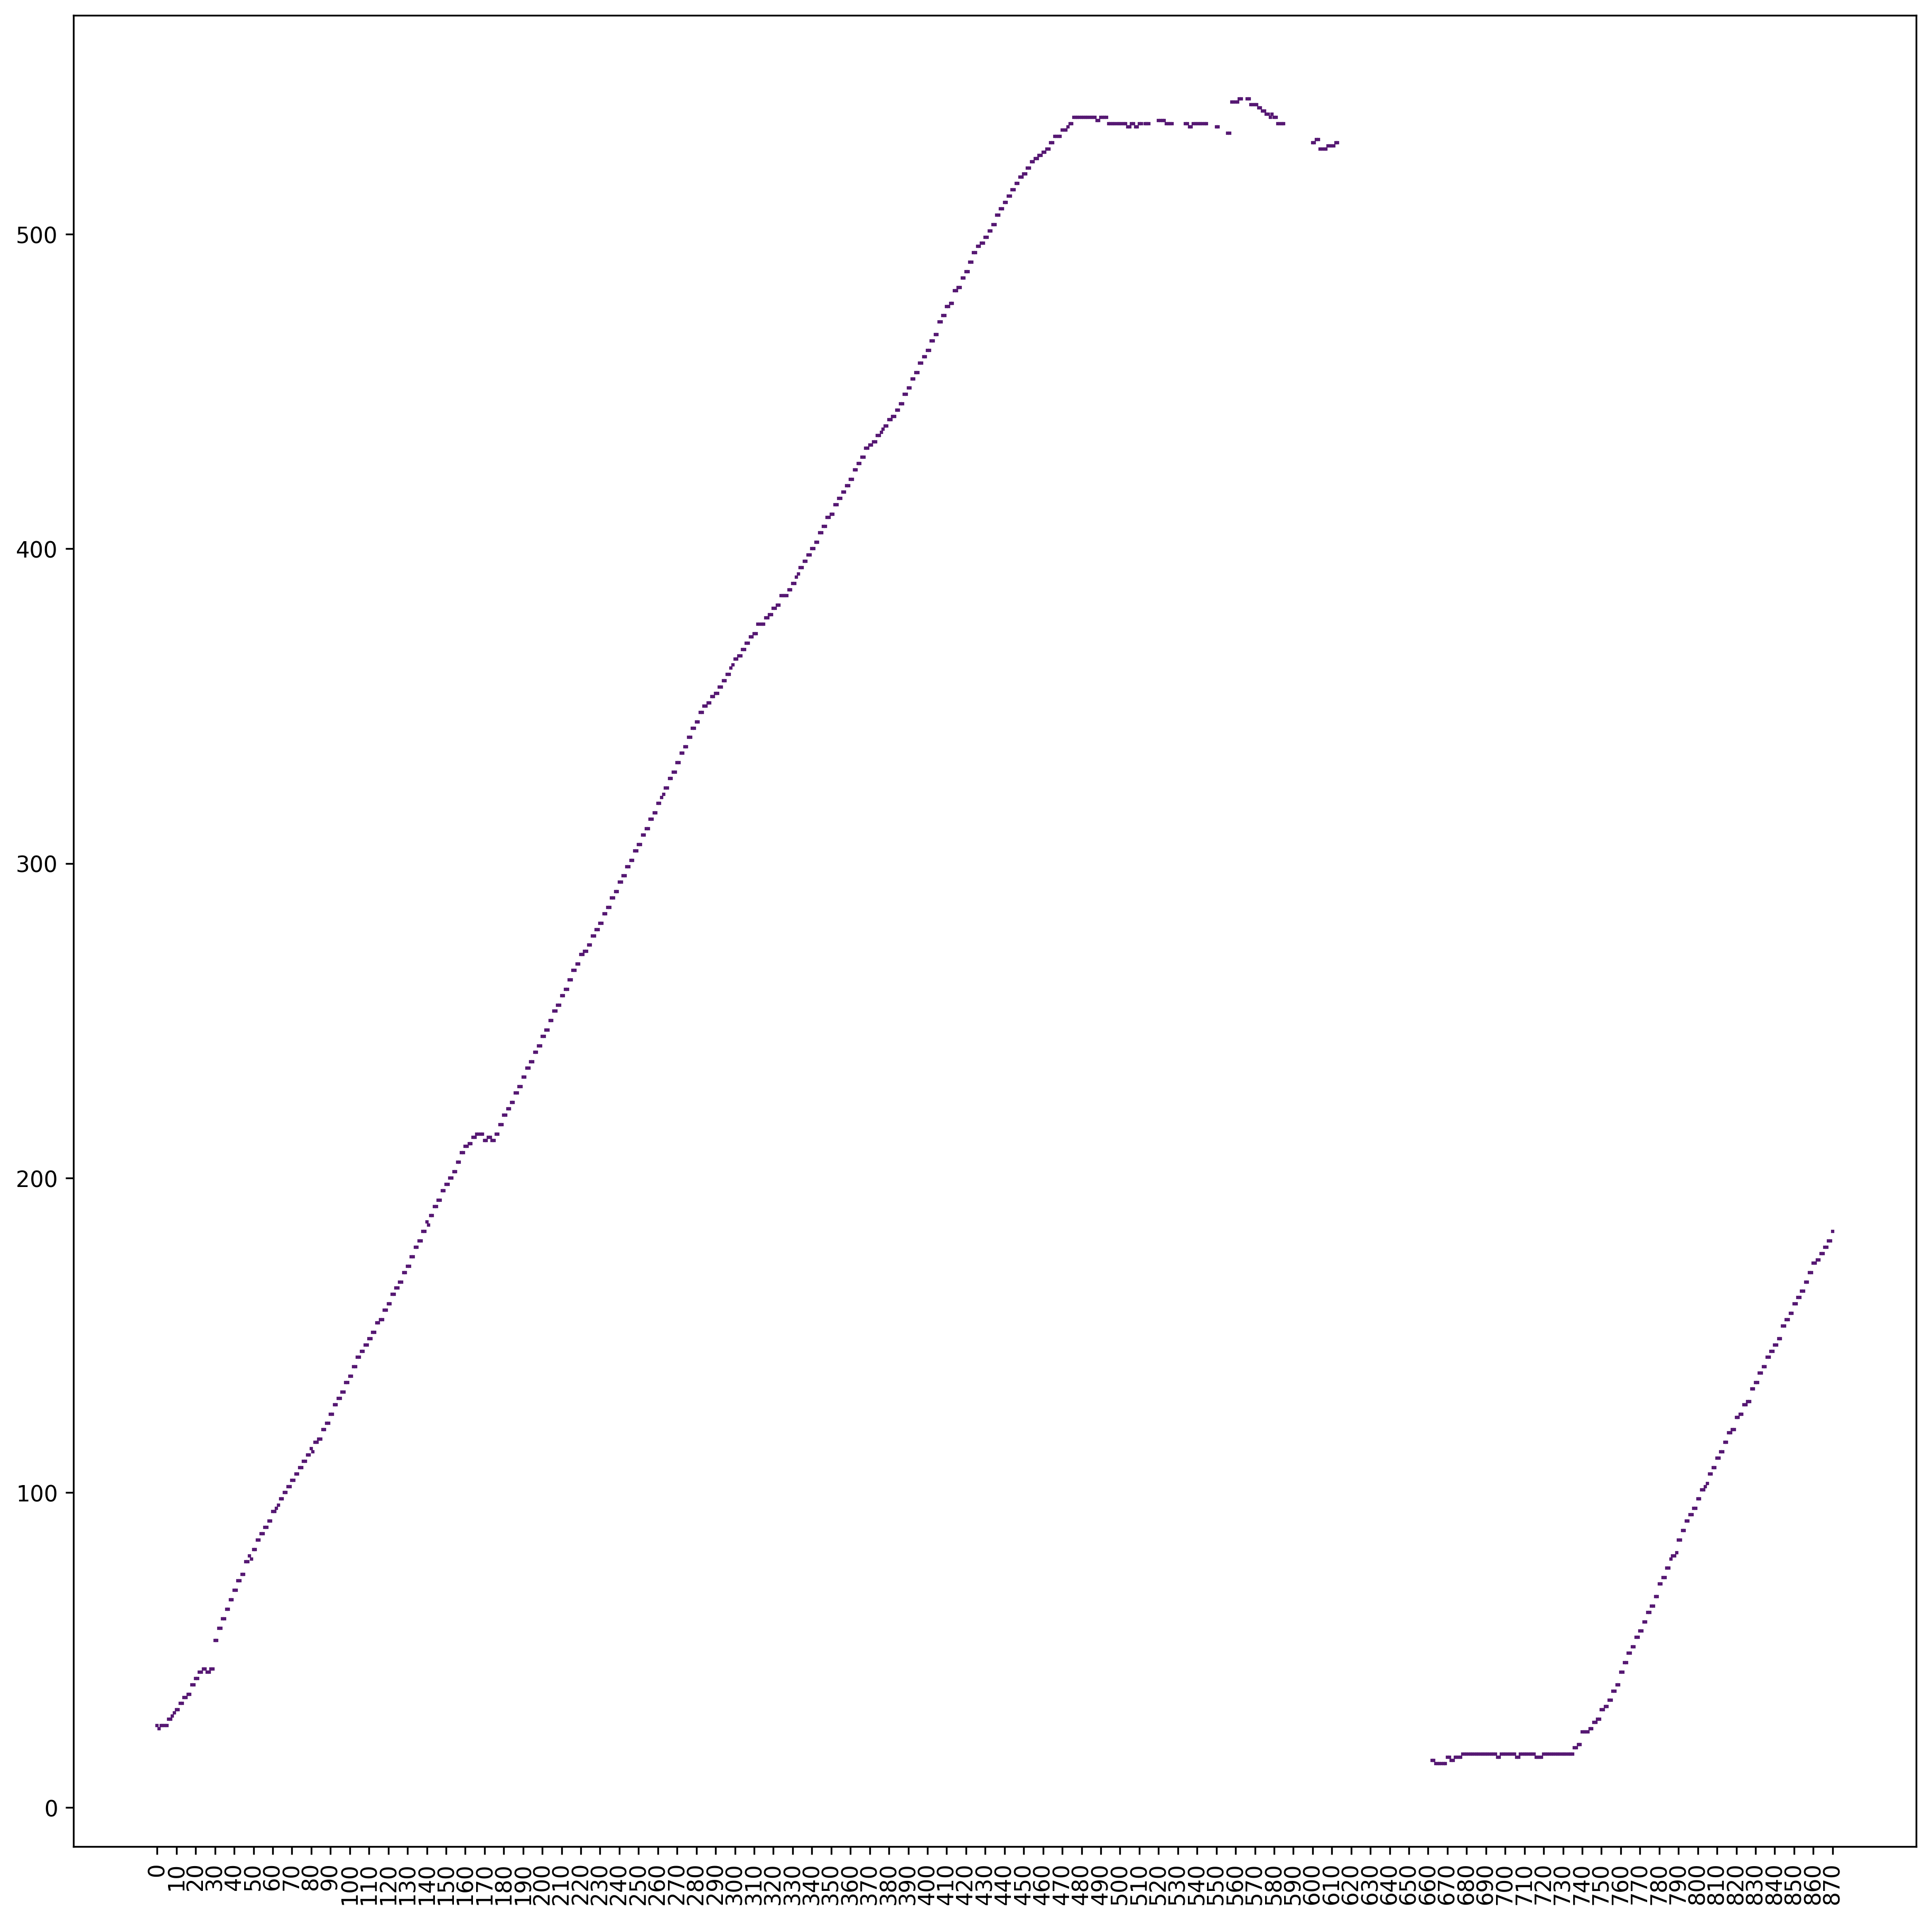

In [250]:
Groups = [1]
frames_in = [[] for i in range(n)]
colors = ["#ff1100", "#561873", "#f7d872", "#5c2926","#878386", "#f7c10c","#ff6e63", "#89e81c", "#678f39","#2d36ad", "#2d6946", "#12db66", "#2fb8d4", "#557f87", "#2d4018", "#234e57", "#6066b5", "#9a60b5", "#d1288d"]
# Binned average?, Show averages for each vial in single color over 4 trims (per video)
fig, ax = plt.subplots(1, 1, figsize=(15, 15), dpi = 300)
ax.set_xticks(np.arange(0, number, 10))
ax.tick_params(axis='x', labelrotation=90)
for i in Groups:
    for p in range(len(points)):
        if points[p][i] != [-1, -1]:
            frames_in[i].append(p)
    ax.scatter([f_in for f_in in frames_in[i]], [y2-points[y][i][0] for y in frames_in[i]], marker = "+", s = 2, c=colors[i])

In [235]:
fg_bin_cropped = []

for i in tqdm(range(number)):
    fg_bin_cropped.append(fg_bin[i][y1:y2,x1:x2])

100%|██████████| 871/871 [00:00<00:00, 114802.30it/s]


Pair [634, 797] [631, 798]
Pair [632, 780] [631, 783]
Pair [652, 799] [650, 799]
Pair [624, 759] [621, 759]
Pair [659, 790] [657, 791]
Pair [637, 784] [634, 785]
Pair [659, 778] [660, 779]
Pair [657, 759] [657, 754]
Pair [628, 792] [627, 790]
Pair [640, 766] [638, 767]
Pair [662, 773] [662, 771]
Pair [645, 763] [644, 766]
Pair [659, 762] [663, 782]


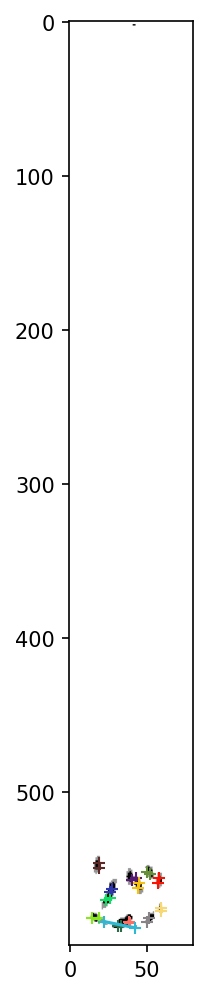

In [236]:
f = 23
plus = 1



plt.figure(figsize=(12,8), dpi = 150)

# rect = Rectangle((0, 0), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
# plt.gca().add_patch(rect)

plt.imshow(get_sum(fg_bin_cropped[f],fg_bin_cropped[f+plus])[0], cmap = plt.get_cmap("Grays"))
# plt.scatter([10 for i in range(n)], [t[f][0] for t in points], marker = ".", c="r", s=10, alpha=0.8)
# plt.scatter([20 for i in range(n)], [t[f+plus][0] for t in points], marker = ".", c="w", s=10, alpha=0.8)

for t in range(n):
    if points[f][t]!=[-1, -1]:
        plt.plot(points[f][t][1]-x1, points[f][t][0]-y1, marker = "+", color = colors[t])
for t in range(n):
    if points[f][t]!=[-1, -1]:
        plt.plot(points[f+plus][t][1]-x1, points[f+plus][t][0]-y1, marker = "+", color = colors[t])

#plt.plot(points[0][f], points[0][f+plus], color="w", alpha=0.5)

for t in range(n):
    if (points[f][t]!=[-1, -1] and points[f+plus][t]!=[-1, -1]):
        plt.plot([points[f][t][1]-x1, points[f+plus][t][1]-x1], [points[f][t][0]-y1, points[f+plus][t][0]-y1], color = colors[t])
        print("Pair", points[f][t], points[f+plus][t]);

plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:27<00:00,  1.80s/it]


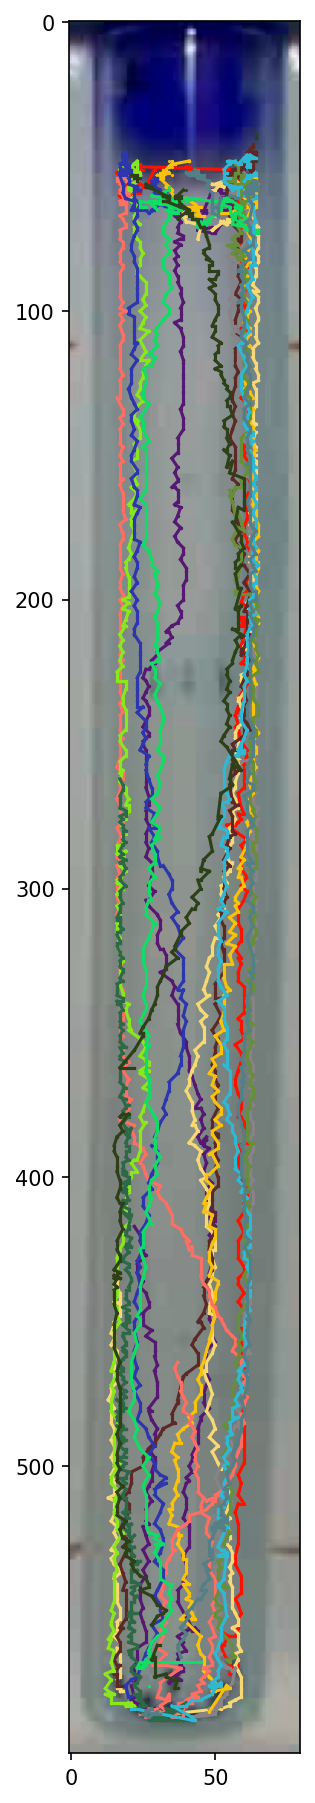

In [251]:
path_tracing = []
graph = [i for i in range(n)]
plt.figure(figsize=(8, 15), dpi=150)
plt.imshow(fr[0])

for t in tqdm(graph):
    path_tracing.append([])

    prev = []
    prev_ind = -1
    for f in range(number):
        pnt = points[f][t]

        if pnt!=[-1, -1]:
            prev = pnt
            prev_ind = f
            break;

    for f in range(prev_ind+1, number):
        pnt = points[f][t]

        if pnt!=[-1,-1]:
            if prev!=[-1,-1]:
                plt.plot([prev[1]-x1, pnt[1]-x1], [prev[0]-y1, pnt[0]-y1], color = colors[t], marker=".", markersize=1)
                prev = pnt
            else:
                plt.plot(pnt[1]-x1, pnt[0]-y1, color = colors[t], marker=".", markersize = 1)
                prev = pnt
        else:
            prev = [-1,-1]
plt.show()

In [187]:
# To make video
vid_frames_raw = raw[:,y1:y2,x1:x2]
vid_frames_bin = fg_bin[:,y1:y2,x1:x2]

#colors = ["b","g","r","c","m","k", "w", "y"]

for f in tqdm(range(number)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.suptitle("Frame "+str(f))

    ax1.imshow(vid_frames_raw[f])
    ax2.imshow(vid_frames_bin[f], cmap = plt.get_cmap("Purples"))
    for t in range(n):
        if (points[f][t] == [-1, -1]):
            continue;
        ax1.plot(points[f][t][1]-x1, points[f][t][0]-y1, marker = ".", color=colors[t], alpha=0.8, markersize=14)
        ax2.plot(points[f][t][1]-x1, points[f][t][0]-y1, marker = ".", color=colors[t], alpha=1, markersize=14)
    plt.savefig("video_frames/frame"+str(f)+".png")
    plt.clf()

  2%|▏         | 20/871 [00:15<09:24,  1.51it/s]/var/folders/sm/lf0m162j07183dvq_bvm7mjw0000gn/T/ipykernel_20687/3561782392.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)
100%|██████████| 871/871 [13:08<00:00,  1.10it/s]


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# To make video of finding flies
vid_frames_raw = raw[:,y1:y2,x1:x2]
vid_frames_bin = fg_bin[:,y1:y2,x1:x2]

for f in tqdm(range(number)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Frame "+str(f))

    ax1.imshow(vid_frames_raw[f])
    ax2.imshow(vid_frames_bin[f])
    for t in range(len(lc[f])):
        ax1.plot(lc[f][t][1]-x1, lc[f][t][0]-y1, marker = "+", alpha=0.5)
        ax2.plot(lc[f][t][1]-x1, lc[f][t][0]-y1, marker = "+", alpha=0.5)
    plt.savefig("video_frames/frame"+str(f)+".png")
    plt.clf()

In [ ]:
# for t in range(num_trims):
#     print("Trim", t)
#     for v in vials.keys():
#         print("       Vial", v)
#         images = []

#         print("              Creating images")
#         for f in tqdm(range(trim_dict[t]["count"])):
#             fig, (ax1, ax2) = plt.subplots(1, 2)
#             fig.set_figheight(10)
#             fig.set_figwidth(10)
#             fig.suptitle("Trim {t} Vial {v} Frame {f}")
#             ax1.imshow(trim_dict[t]["vials"][v]["c raw"][f])
#             ax2.imshow(trim_dict[t]["vials"][v]["c bin"][f], cmap = plt.get_cmap("Purples"))
            
#             points = trim_dict[t]["vials"][v]["points"]
#             for g in range(vials[v][4]):
#                 if (trim_dict[t]["vials"][v]["points"][f][g] == [-1, -1]):
#                     continue;
#                 ax1.plot(points[g][t][1]-trim_dict[t]["vials"][v]["x1"], points[f][g][0]-trim_dict[t]["vials"][v]["y1"], marker = ".", color=colors[g], alpha=0.8, markersize=14)
#                 ax2.plot(points[g][t][1]-trim_dict[t]["vials"][v]["x1"], points[f][g][0]-trim_dict[t]["vials"][v]["y1"], marker = ".", color=colors[g], alpha=1, markersize=14)
#             images.append(fig)

#         print("              Saving images to disk")
#         for f in tqdm(range(trim_dict[t]["count"])):
#             plt.savefig("video_frames/set_"+str(4)+"/trim_"+str(t)+"/vial_"+str(v)+"/frame_"+str(f)+".png")
#             plt.close(fig)

In [188]:
image_folder = "video_frames"
video_name = "video.avi"

images = ["frame"+str(i)+".png" for i in range(number)]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))
for image in tqdm(images):
    video.write(cv2.imread(os.path.join(image_folder, image)))
    
cv2.destroyAllWindows()
video.release()

100%|██████████| 871/871 [01:05<00:00, 13.34it/s]


In [100]:
total = []
for i in tqdm(range(300)):
    res = analyze(i, 0, 1270, 0, 710)
    total.append([res[0], res[1]])

  0%|          | 0/300 [00:00<?, ?it/s]


TypeError: analyze() missing 1 required positional argument: 'thresh'

In [6]:
ffg = [cur.astype(np.uint8) for cur in fg_bin]
analysis = cv2.connectedComponentsWithStats(ffg[5], 8, cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis 
# print(totalLabels)
print(centroid.shape)

(94, 2)


In [7]:
output = np.zeros(ffg[10].shape, dtype="uint8")

for i in range(1, totalLabels): 
    area = values[i, cv2.CC_STAT_AREA]   
    if (area > 10) and (area < 200): 
        componentMask = (label_ids == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)
        
centroid[0:10]

array([[ 634.32122957,  357.29703598],
       [1268.30699364,  167.27520436],
       [1269.51219512,  202.92682927],
       [1268.58841651,  247.83302526],
       [1256.        ,  228.        ],
       [1263.95864662,  334.77819549],
       [1269.13802083,  358.49479167],
       [1269.04      ,  386.44      ],
       [1272.54054054,  395.62162162],
       [1263.98029557,  417.43103448]])

In [8]:
print(len(centroid))

94


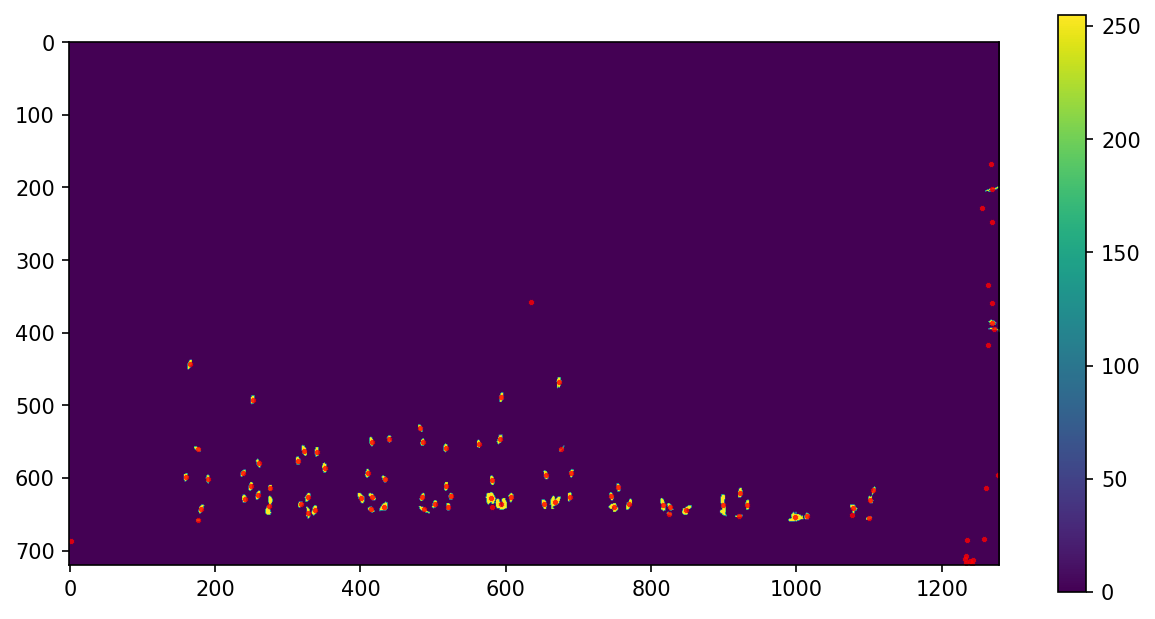

In [9]:
plt.figure(figsize=(10,5), dpi=150)
plt.imshow(output)
plt.colorbar()
plt.scatter(centroid[:, 0], centroid[:, 1], marker = "x", c="r", s=3, alpha=0.8)
plt.show()
# cv2.waitKey(0)

## Combine everything

In [117]:
cap = cv2.VideoCapture("./videos/February/TRIM_Archana_ELAV_01_Feb-20_12-17.avi")

frames = []

while True:
    
    ret, frame = cap.read()
    
    if ret is False:
        break
    else:
        frame = frame.mean(axis=2)
        frame = (frame*128) / frame.mean()
        frames.append(frame)

    
    
frames = np.array(frames)

print(len(frames))

302


In [120]:
centroid_dict = {}
med = np.max(frames, axis=0)
for idx, frame in tqdm(enumerate(frames)):
    fg = frame - med
    fg = (fg - fg.min()) / (fg.max() - fg.min()) * 255
    
    fg_binary = fg < (0.75 * 255)
    fg_binary = fg_binary.astype(np.uint8)
    analysis = cv2.connectedComponentsWithStats(fg_binary, 8, cv2.CV_32S) 
    totalLabels, label_ids, values, centroids = analysis
    
    output = np.zeros(fg.shape, dtype="uint8")

    for i in range(1, totalLabels): 
        area = values[i, cv2.CC_STAT_AREA]   
        if (area > 20) and (area < 200): 
            componentMask = (label_ids == i).astype("uint8") * 255
            output = cv2.bitwise_or(output, componentMask)  
    centroid_dict[idx] = centroids[0:]  

print(f"centroids for frame 10: {centroid_dict[10]}")

302it [00:08, 35.05it/s]

centroids for frame 10: [[ 636.94802516  358.84482939]
 [1269.062249    192.9252008 ]
 [1262.          251.        ]
 [1264.          255.        ]
 [1271.          254.        ]
 [1268.35802469  309.93209877]
 [1265.57740586  344.25941423]
 [1276.          353.5       ]
 [1261.          376.        ]
 [1258.2         382.4       ]
 [1264.36363636  412.93181818]
 [ 165.13043478  436.56521739]
 [ 669.5         449.61764706]
 [ 593.86666667  474.93333333]
 [ 252.07692308  479.03846154]
 [ 480.8         522.3       ]
 [ 593.42857143  534.52380952]
 [ 413.95833333  535.83333333]
 [ 319.4         547.8       ]
 [ 517.          546.        ]
 [ 562.89473684  546.        ]
 [ 485.76        550.68      ]
 [ 339.30769231  552.07692308]
 [ 176.5         560.41666667]
 [ 349.64864865  573.94594595]
 [ 258.2         574.28      ]
 [ 314.80555556  576.16666667]
 [ 410.48148148  580.85185185]
 [ 651.43478261  582.82608696]
 [ 242.37037037  585.03703704]
 [ 163.625       588.33333333]
 [ 690.17391304

In [124]:
centroid_dict[10].shape

(106, 2)

In [123]:
len(centroid_dict[10])

106

In [125]:
centroid_dict[10]

array([[ 636.94802516,  358.84482939],
       [1269.062249  ,  192.9252008 ],
       [1262.        ,  251.        ],
       [1264.        ,  255.        ],
       [1271.        ,  254.        ],
       [1268.35802469,  309.93209877],
       [1265.57740586,  344.25941423],
       [1276.        ,  353.5       ],
       [1261.        ,  376.        ],
       [1258.2       ,  382.4       ],
       [1264.36363636,  412.93181818],
       [ 165.13043478,  436.56521739],
       [ 669.5       ,  449.61764706],
       [ 593.86666667,  474.93333333],
       [ 252.07692308,  479.03846154],
       [ 480.8       ,  522.3       ],
       [ 593.42857143,  534.52380952],
       [ 413.95833333,  535.83333333],
       [ 319.4       ,  547.8       ],
       [ 517.        ,  546.        ],
       [ 562.89473684,  546.        ],
       [ 485.76      ,  550.68      ],
       [ 339.30769231,  552.07692308],
       [ 176.5       ,  560.41666667],
       [ 349.64864865,  573.94594595],
       [ 258.2       ,  5

- create thresh values 
- create function that takes in a frame_number -> outputs percent of flies that crosses x-tresh
- avg position vs frame plot

100%|██████████| 103/103 [00:00<00:00, 756590.74it/s]


33

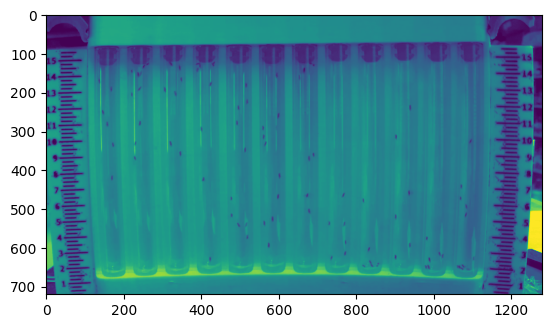

In [127]:
def cross_thresh(frame_num, thresh = 250):
    newlist = []
    for i in tqdm(range(len(centroid_dict[frame_num]))):
        if centroid_dict[frame_num][i][1] < thresh:
            newlist.append(centroid_dict[frame_num][i][1])
            
    plt.imshow(frames[frame_num])
    return len(newlist)      

cross_thresh(250)

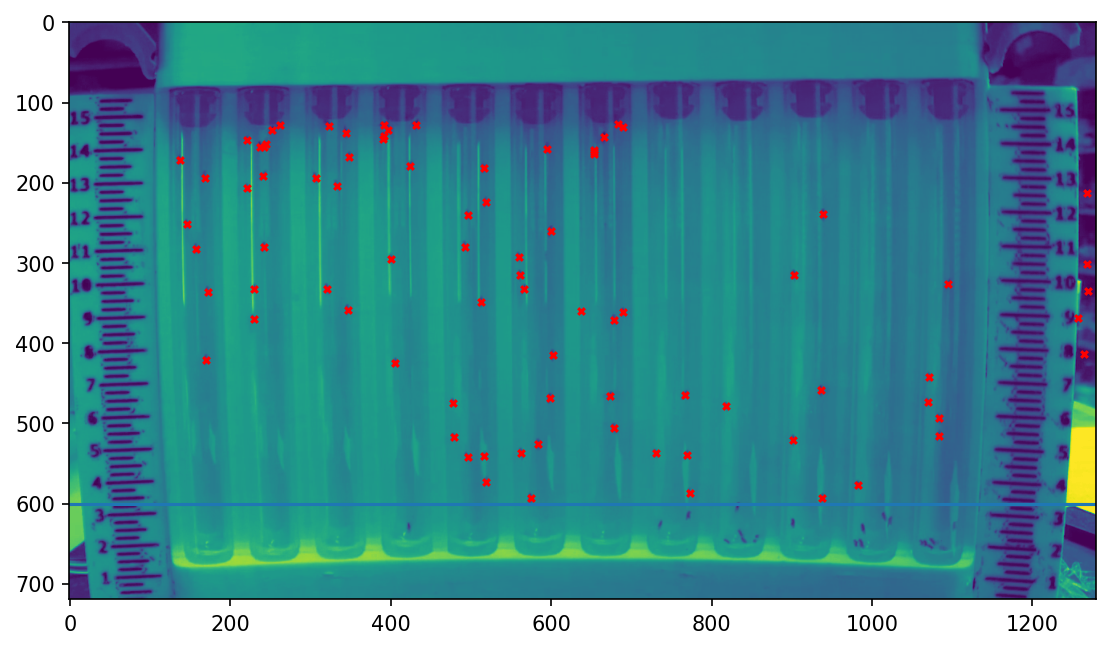

84
0.8155339805825242


In [149]:
def cross_thresh(frame_num, thresh = 600):
    fly_pos = centroid_dict[frame_num]
    cond = fly_pos[:, 1] < thresh

    return sum(cond), fly_pos[cond, :]

count, fly_pos = cross_thresh(250)

plt.figure(figsize=(10,5), dpi=150)
plt.imshow(frames[250])
plt.axhline(y = 600)
plt.scatter(fly_pos[:, 0], fly_pos[:, 1], c = 'red', s= 10, marker = 'x')
plt.show()
print(count)
print(count / len(centroid_dict[250]))

(700.0, 300.0)

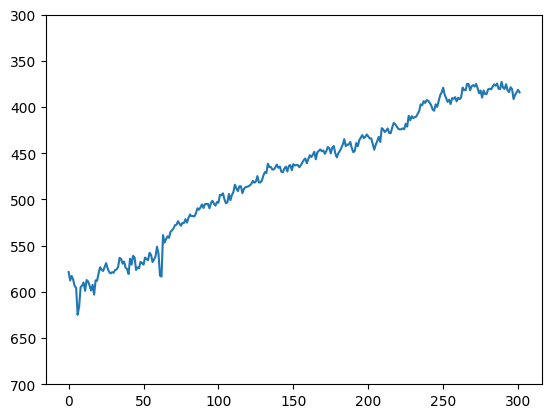

In [146]:
def group_y_pos():
    avg_height = []
    for fn in centroid_dict:
        fly_pos = centroid_dict[fn]
        avg_height.append(fly_pos[:, 1].mean())
    return np.array(avg_height)

avg_y_pos=group_y_pos()
plt.plot(avg_y_pos)
plt.ylim(700,300)

- group flies in vials (instead of all together)
- 

In [147]:
len(centroid_dict[10])

106

In [135]:
fly_pos = centroid_dict[10]
sum_flies = fly_pos[: 1].mean()
sum_flies

497.89642727586613